<a href="https://colab.research.google.com/github/aekanun2020/Data-Analytics-using-Python/blob/main/from_Solution_Homework_to_Regression_withNOSCALER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! wget https://storage.googleapis.com/1sep/2008.csv

--2023-10-23 07:01:54--  https://storage.googleapis.com/1sep/2008.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.214.207, 108.177.111.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.214.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 689413344 (657M) [text/csv]
Saving to: ‘2008.csv’

2008.csv            100%[===================>] 657.48M  44.1MB/s    in 16s     

2023-10-23 07:02:11 (40.8 MB/s) - ‘2008.csv’ saved [689413344/689413344]



In [4]:
! wc -l 2008.csv

7009729 2008.csv


In [5]:
f = "2008.csv"
num_lines = sum(1 for l in open(f))
size = int(num_lines / 100)
import random
skip_idx = random.sample(range(1, num_lines), num_lines - size)
raw_pd = pd.read_csv(f, skiprows=skip_idx)

In [6]:
#raw_pd = pd.read_csv("2008.csv")

In [7]:
raw_pd.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1150.0,1145,1303.0,1305,WN,2124,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,2102.0,2100,2225.0,2230,WN,3239,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,1815.0,1755,1923.0,1915,WN,581,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1048.0,1005,1201.0,1140,WN,813,...,6.0,10.0,0,NaN,0,3.0,0.0,0.0,0.0,18.0
4,2008,1,3,4,621.0,615,753.0,755,WN,491,...,4.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [8]:
raw_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70096 entries, 0 to 70095
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               70096 non-null  int64  
 1   Month              70096 non-null  int64  
 2   DayofMonth         70096 non-null  int64  
 3   DayOfWeek          70096 non-null  int64  
 4   DepTime            68793 non-null  float64
 5   CRSDepTime         70096 non-null  int64  
 6   ArrTime            68637 non-null  float64
 7   CRSArrTime         70096 non-null  int64  
 8   UniqueCarrier      70096 non-null  object 
 9   FlightNum          70096 non-null  int64  
 10  TailNum            69285 non-null  object 
 11  ActualElapsedTime  68614 non-null  float64
 12  CRSElapsedTime     70089 non-null  float64
 13  AirTime            68614 non-null  float64
 14  ArrDelay           68614 non-null  float64
 15  DepDelay           68793 non-null  float64
 16  Origin             700

In [9]:
raw_pd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,70096.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,70096.0,6.373131,3.401883,1.0,3.0,6.0,9.0,12.0
DayofMonth,70096.0,15.672007,8.782758,1.0,8.0,16.0,23.0,31.0
DayOfWeek,70096.0,3.919981,1.990154,1.0,2.0,4.0,6.0,7.0
DepTime,68793.0,1335.031326,478.744830,1.0,928.0,1326.0,1729.0,2400.0
CRSDepTime,70096.0,1326.720041,464.739303,1.0,925.0,1320.0,1715.0,2359.0
ArrTime,68637.0,1482.885455,506.034002,1.0,1106.0,1513.0,1909.0,2400.0
CRSArrTime,70096.0,1495.374686,483.620316,1.0,1115.0,1518.0,1908.0,2400.0
FlightNum,70096.0,2220.626441,1958.626207,1.0,620.0,1568.0,3504.0,7829.0
ActualElapsedTime,68614.0,127.692716,70.718137,15.0,77.0,110.0,158.0,1379.0


In [10]:
## เตรียมข้อมูลสำหรับการวิเคราะห์หา C.V.

describe_pd = pd.DataFrame(raw_pd.describe().transpose())

describe_pd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, Year to LateAircraftDelay
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   24 non-null     float64
 1   mean    24 non-null     float64
 2   std     24 non-null     float64
 3   min     24 non-null     float64
 4   25%     24 non-null     float64
 5   50%     24 non-null     float64
 6   75%     24 non-null     float64
 7   max     24 non-null     float64
dtypes: float64(8)
memory usage: 2.2+ KB


In [11]:
## ดู Dispersion จาก C.V.

#describe_pd['std'].apply(lambda x: x/100)
describe_pd.assign(cv=lambda x: ((100/x['mean'])*x['std']))[['mean','std','cv']]
#df.assign(Discount_Percent=lambda x: (100/x.Fee)*x.Discount)

,mean,std,cv
Year,2008.000000,0.000000,0.000000
Month,6.373131,3.401883,53.378512
DayofMonth,15.672007,8.782758,56.041052
DayOfWeek,3.919981,1.990154,50.769479
DepTime,1335.031326,478.744830,35.860194
CRSDepTime,1326.720041,464.739303,35.029191
ArrTime,1482.885455,506.034002,34.124956
CRSArrTime,1495.374686,483.620316,32.341079
FlightNum,2220.626441,1958.626207,88.201517
ActualElapsedTime,127.692716,70.718137,55.381496


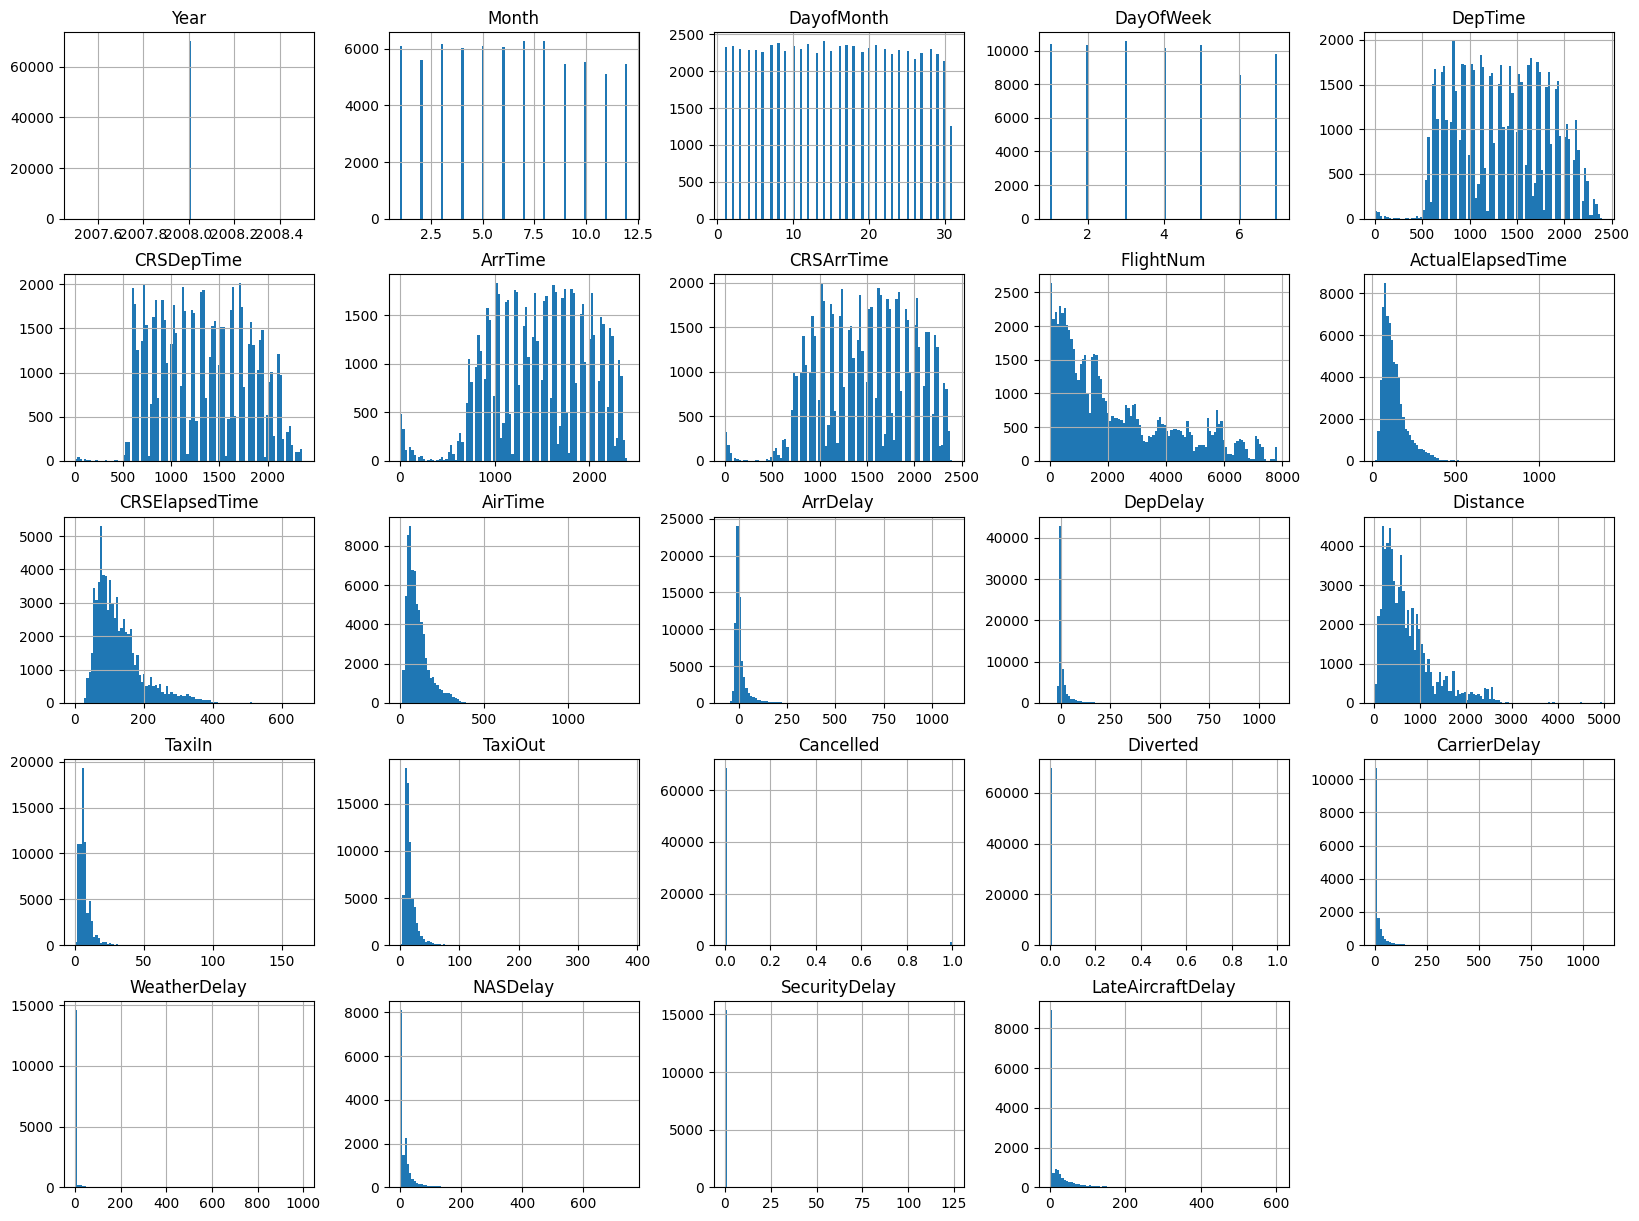

In [12]:
## ดู Distribution ของแต่ละ column

raw_pd.hist(bins=100, figsize=(20,15))
plt.show()

In [13]:
categorical = list(raw_pd.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(raw_pd.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'CancellationCode']
Numerical columns are: ['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'FlightNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']


In [14]:
## Feature Engineering, Model Training and Evaluation

In [15]:
features_pd = raw_pd[['UniqueCarrier','Origin','Dest',\
        'DepTime','TaxiOut','TaxiIn','DepDelay',\
        'DayOfWeek','Distance','ArrDelay']]

In [16]:
final_pd = features_pd.dropna()

In [17]:
final_pd.count()

UniqueCarrier    68614
Origin           68614
Dest             68614
DepTime          68614
TaxiOut          68614
TaxiIn           68614
DepDelay         68614
DayOfWeek        68614
Distance         68614
ArrDelay         68614
dtype: int64

In [18]:
features_pd.head(20)

,UniqueCarrier,Origin,Dest,DepTime,TaxiOut,TaxiIn,DepDelay,DayOfWeek,Distance,ArrDelay
0,WN,JAN,HOU,1150.0,7.0,3.0,5.0,4,359,-2.0
1,WN,MCI,DAL,2102.0,12.0,4.0,2.0,4,461,-5.0
2,WN,MDW,BNA,1815.0,10.0,4.0,20.0,4,395,8.0
3,WN,MHT,MDW,1048.0,10.0,6.0,43.0,4,838,21.0
4,WN,OAK,PDX,621.0,11.0,4.0,6.0,4,543,-2.0
5,WN,OAK,SEA,801.0,12.0,4.0,1.0,4,671,-11.0
6,WN,ONT,OAK,823.0,7.0,3.0,-2.0,4,361,-4.0
7,WN,PHX,OMA,734.0,11.0,3.0,19.0,4,1037,11.0
8,WN,PHX,TUL,1011.0,16.0,3.0,1.0,4,935,-3.0
9,WN,PIT,MDW,1429.0,11.0,5.0,19.0,4,402,14.0


In [19]:
#final_pd = noNull_pd

In [20]:
import pandas as pd
from seaborn import load_dataset
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

In [21]:
train_df = final_pd.sample(frac=0.8,random_state=123)

In [22]:
test_df = final_pd.drop(train_df.index)

In [23]:
train_df.count()

UniqueCarrier    54891
Origin           54891
Dest             54891
DepTime          54891
TaxiOut          54891
TaxiIn           54891
DepDelay         54891
DayOfWeek        54891
Distance         54891
ArrDelay         54891
dtype: int64

In [24]:
test_df.count()

UniqueCarrier    13723
Origin           13723
Dest             13723
DepTime          13723
TaxiOut          13723
TaxiIn           13723
DepDelay         13723
DayOfWeek        13723
Distance         13723
ArrDelay         13723
dtype: int64

In [25]:
train_labels = train_df.filter(['ArrDelay'])
train_df = train_df.loc[:, train_df.columns != 'ArrDelay']

In [26]:
type(train_labels)

pandas.core.frame.DataFrame

In [27]:
test_labels = test_df.filter(['ArrDelay'])
test_df = test_df.loc[:, test_df.columns != 'ArrDelay']

In [28]:
X_train = train_df
X_test = test_df
y_train = train_labels
y_test = test_labels

In [29]:
categorical = list(X_train.select_dtypes('object').columns)
print(f"Categorical columns are: {categorical}")

numerical = list(X_train.select_dtypes('number').columns)
print(f"Numerical columns are: {numerical}")

Categorical columns are: ['UniqueCarrier', 'Origin', 'Dest']
Numerical columns are: ['DepTime', 'TaxiOut', 'TaxiIn', 'DepDelay', 'DayOfWeek', 'Distance']


In [30]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
# Define custom transformer
class ColumnSelector(BaseEstimator, TransformerMixin):
    """Select only specified columns."""
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.columns]

# Define categorical pipeline
cat_pipe = Pipeline([('selector', ColumnSelector(categorical)),
                     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))])

# Define numerical pipeline
num_pipe = Pipeline([('selector', ColumnSelector(numerical))
                     #('imputer', SimpleImputer(strategy='median')),
                     #('scaler', MinMaxScaler())
                    ])

# Combine categorical and numerical pipeline
preprocessor = FeatureUnion(transformer_list=[('cat', cat_pipe),
                                              ('num', num_pipe)])

# Model Training
pipe = Pipeline(steps=[('preprocessor', preprocessor),
              ('model', DecisionTreeRegressor(max_depth=None))])
pipeline_model = pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [32]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = pipeline_model.predict(X_test)
print("\t RMSE:", mean_squared_error(y_test, predictions, squared=False))
print("\t R2 score:", r2_score(y_test, predictions))

	 RMSE: 14.148433412892697
	 R2 score: 0.859314352344941
